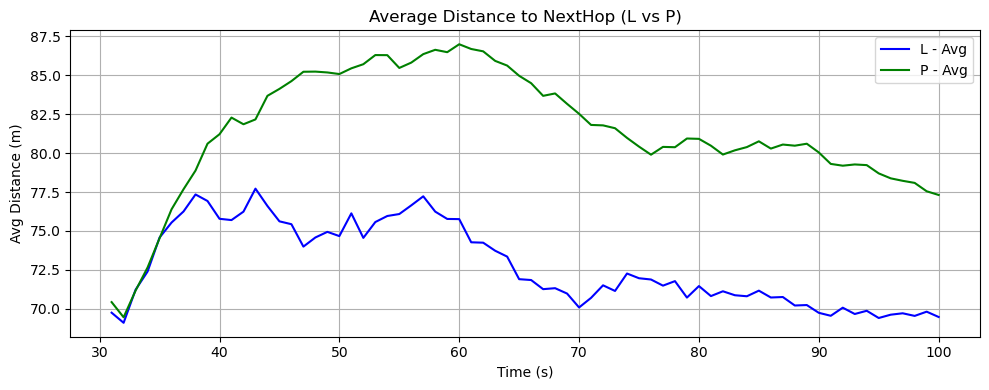

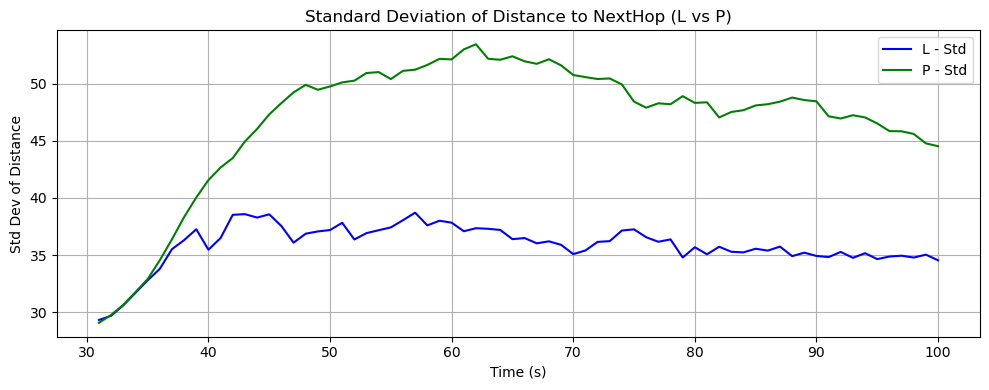

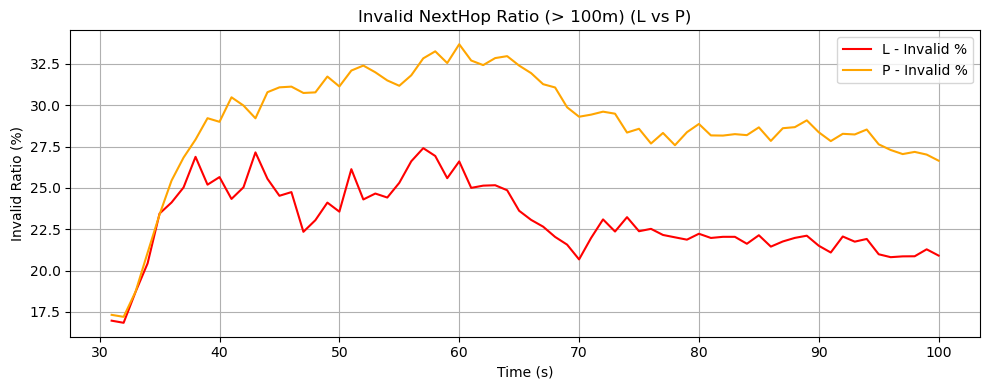

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
node = "N0"
methods = ["L", "P"]
max_tx_dist = 100.0

per_method_result = {}

for method in methods:
    pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
    if not os.path.exists(pos_path):
        print(f"[{method}] 위치 파일 없음: {pos_path}")
        continue

    df_all = pd.read_csv(pos_path)
    times = sorted(df_all["Time"].unique())
    avg_distances, std_distances, invalid_ratios = [], [], []

    for t in times:
        df_t = df_all[df_all["Time"] == t]
        if df_t.empty:
            avg_distances.append(0)
            std_distances.append(0)
            invalid_ratios.append(0)
            continue

        dists = []
        invalid, total = 0, 0

        for _, row in df_t.iterrows():
            dist = sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
            dists.append(dist)
            total += 1
            if dist > max_tx_dist:
                invalid += 1

        avg = sum(dists) / len(dists) if dists else 0
        std = pd.Series(dists).std() if dists else 0
        ratio = (invalid / total) * 100.0 if total > 0 else 0.0

        avg_distances.append(avg)
        std_distances.append(std)
        invalid_ratios.append(ratio)

    per_method_result[method] = {
        "times": times,
        "avg": avg_distances,
        "std": std_distances,
        "invalid": invalid_ratios
    }

times = per_method_result["L"]["times"]
plt.figure(figsize=(10, 4))
plt.plot(times, per_method_result["L"]["avg"], label="L - Avg", color='blue')
plt.plot(times, per_method_result["P"]["avg"], label="P - Avg", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Avg Distance (m)")
plt.title("Average Distance to NextHop (L vs P)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(times, per_method_result["L"]["std"], label="L - Std", color='blue')
plt.plot(times, per_method_result["P"]["std"], label="P - Std", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Std Dev of Distance")
plt.title("Standard Deviation of Distance to NextHop (L vs P)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(times, per_method_result["L"]["invalid"], label="L - Invalid %", color='red')
plt.plot(times, per_method_result["P"]["invalid"], label="P - Invalid %", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Invalid Ratio (%)")
plt.title("Invalid NextHop Ratio (> 100m) (L vs P)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


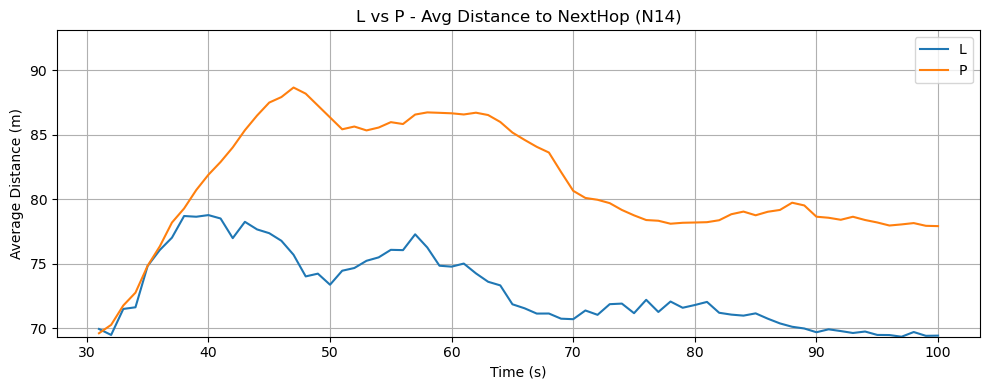

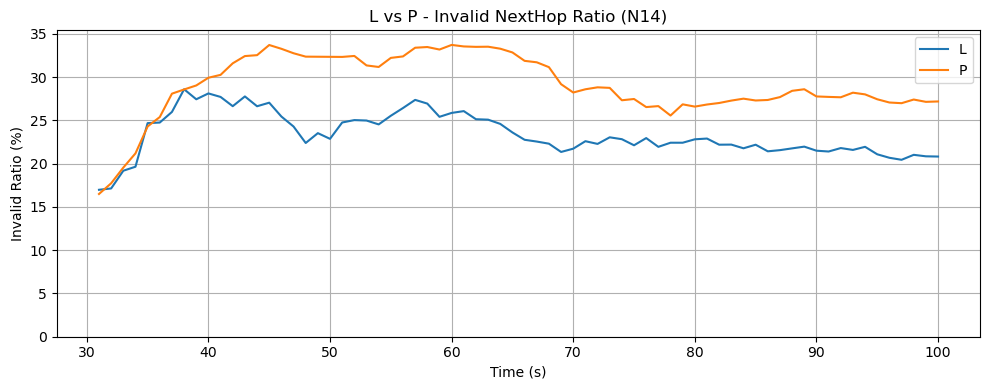

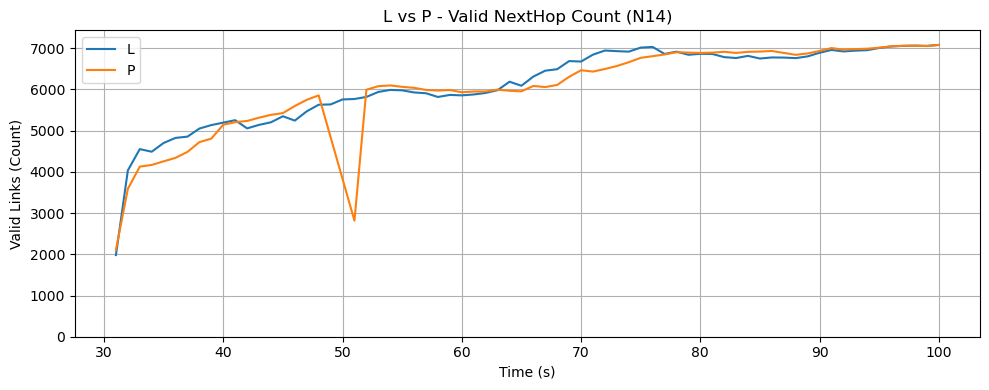

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
node = "N14"
methods = ["L", "P"]
max_tx_dist = 100.0

results = {}

for method in methods:
    pos_path = os.path.join(base_path, method, density, speed, node, "position.csv")
    if not os.path.exists(pos_path):
        print(f"[{method}] 위치 파일 없음: {pos_path}")
        continue

    df_all = pd.read_csv(pos_path)
    times = sorted(df_all["Time"].unique())
    avg_distances, invalid_ratios, valid_counts, times_for_plot = [], [], [], []

    for t in times:
        df_t = df_all[df_all["Time"] == t]
        if df_t.empty:
            avg_distances.append(0)
            invalid_ratios.append(0)
            valid_counts.append(0)
            times_for_plot.append(t)
            continue

        dists = []
        invalid, total = 0, 0

        for _, row in df_t.iterrows():
            dist = sqrt((row["NodeX"] - row["NextHopX"])**2 + (row["NodeY"] - row["NextHopY"])**2)
            dists.append(dist)
            total += 1
            if dist > max_tx_dist:
                invalid += 1

        avg = sum(dists) / len(dists) if dists else 0
        ratio = (invalid / total) * 100.0 if total > 0 else 0.0

        avg_distances.append(avg)
        invalid_ratios.append(ratio)
        valid_counts.append(total - invalid)
        times_for_plot.append(t)

    results[method] = {
        "times": times_for_plot,
        "avg_distances": avg_distances,
        "invalid_ratios": invalid_ratios,
        "valid_counts": valid_counts
    }

all_avg_dists = [v for m in results.values() for v in m["avg_distances"]]
all_invalids = [v for m in results.values() for v in m["invalid_ratios"]]
all_valid_counts = [v for m in results.values() for v in m["valid_counts"]]

avg_ymin, avg_ymax = min(all_avg_dists), max(all_avg_dists)
inv_ymin, inv_ymax = 0, max(all_invalids)
val_ymin, val_ymax = 0, max(all_valid_counts)

plt.figure(figsize=(10, 4))
for method in methods:
    if method in results:
        plt.plot(results[method]["times"], results[method]["avg_distances"], label=method)
plt.xlabel("Time (s)")
plt.ylabel("Average Distance (m)")
plt.title(f"L vs P - Avg Distance to NextHop ({node})")
plt.ylim(avg_ymin, avg_ymax * 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
for method in methods:
    if method in results:
        plt.plot(results[method]["times"], results[method]["invalid_ratios"], label=method)
plt.xlabel("Time (s)")
plt.ylabel("Invalid Ratio (%)")
plt.title(f"L vs P - Invalid NextHop Ratio ({node})")
plt.ylim(inv_ymin, inv_ymax * 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
for method in methods:
    if method in results:
        plt.plot(results[method]["times"], results[method]["valid_counts"], label=method)
plt.xlabel("Time (s)")
plt.ylabel("Valid Links (Count)")
plt.title(f"L vs P - Valid NextHop Count ({node})")
plt.ylim(val_ymin, val_ymax * 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


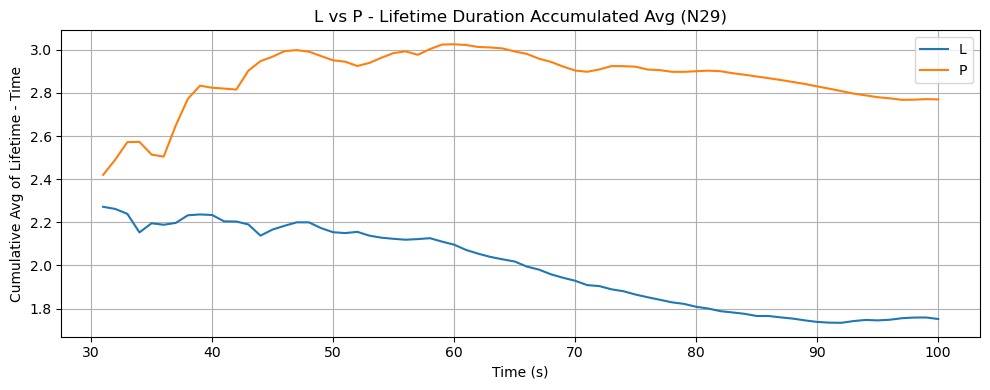

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
node = "N29"
methods = ["L", "P"]

results = {}

for method in methods:
    rt_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
    if not os.path.exists(rt_path):
        continue

    df = pd.read_csv(rt_path)
    df["LifetimeDiff"] = df["Lifetime"] - df["Time"]
    grouped = df.groupby("Time")["LifetimeDiff"].mean().sort_index()

    cumulative_sum = grouped.cumsum()
    cumulative_avg = cumulative_sum / range(1, len(cumulative_sum) + 1)

    results[method] = {
        "times": grouped.index.tolist(),
        "cumulative_avg": cumulative_avg.tolist()
    }

plt.figure(figsize=(10, 4))
for method in methods:
    if method in results:
        plt.plot(results[method]["times"], results[method]["cumulative_avg"], label=method)
plt.xlabel("Time (s)")
plt.ylabel("Cumulative Avg of Lifetime - Time")
plt.title(f"L vs P - Lifetime Duration Accumulated Avg ({node})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

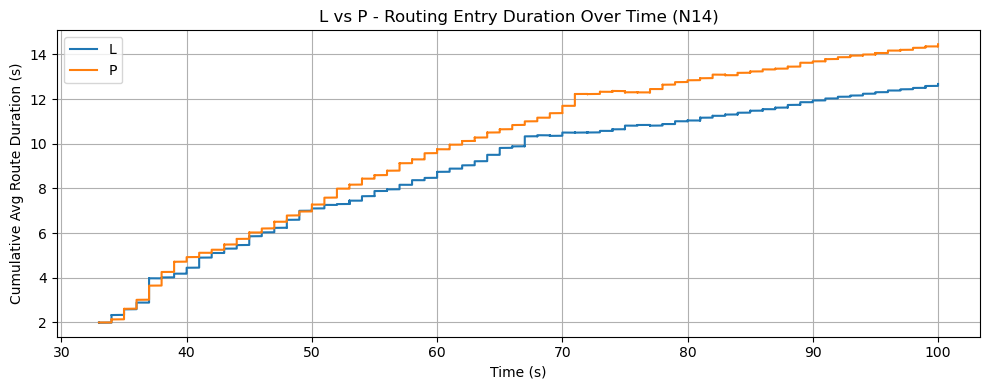

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
node = "N14"
methods = ["L", "P"]

results = {}

for method in methods:
    file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
    if not os.path.exists(file_path):
        print(f"{method} 파일 없음")
        continue

    df = pd.read_csv(file_path)
    df = df[["Time", "Node", "Destination", "Active"]]
    df["Time"] = df["Time"].astype(float)

    grouped = df.groupby(["Node", "Destination"])

    time_duration_pairs = []

    for (node_id, dest), group in grouped:
        group = group.sort_values("Time")
        entry_time = None

        for _, row in group.iterrows():
            if row["Active"] == True and entry_time is None:
                entry_time = row["Time"]
            elif row["Active"] == False and entry_time is not None:
                duration = row["Time"] - entry_time
                time_duration_pairs.append((row["Time"], duration))
                entry_time = None

    df_result = pd.DataFrame(time_duration_pairs, columns=["Time", "Duration"])
    df_result = df_result.sort_values("Time")
    df_result["CumulativeAvg"] = df_result["Duration"].expanding().mean()
    results[method] = df_result

plt.figure(figsize=(10, 4))
for method in methods:
    if method in results:
        plt.plot(results[method]["Time"], results[method]["CumulativeAvg"], label=method)
plt.xlabel("Time (s)")
plt.ylabel("Cumulative Avg Route Duration (s)")
plt.title(f"L vs P - Routing Entry Duration Over Time ({node})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


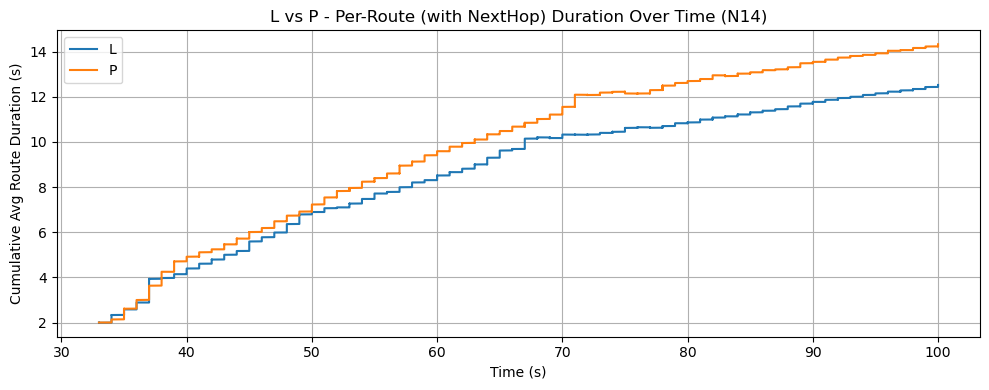

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
node = "N14"
methods = ["L", "P"]

results = {}

for method in methods:
    file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
    if not os.path.exists(file_path):
        print(f"{method} 파일 없음")
        continue

    df = pd.read_csv(file_path)
    df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
    df["Time"] = df["Time"].astype(float)

    grouped = df.groupby(["Node", "Destination", "NextHop"])

    time_duration_pairs = []

    for (node_id, dest, nexthop), group in grouped:
        group = group.sort_values("Time")
        entry_time = None

        for _, row in group.iterrows():
            if row["Active"] == True and entry_time is None:
                entry_time = row["Time"]
            elif row["Active"] == False and entry_time is not None:
                duration = row["Time"] - entry_time
                time_duration_pairs.append((row["Time"], duration))
                entry_time = None

    df_result = pd.DataFrame(time_duration_pairs, columns=["Time", "Duration"])
    df_result = df_result.sort_values("Time")
    df_result["CumulativeAvg"] = df_result["Duration"].expanding().mean()
    results[method] = df_result

plt.figure(figsize=(10, 4))
for method in methods:
    if method in results:
        plt.plot(results[method]["Time"], results[method]["CumulativeAvg"], label=method)
plt.xlabel("Time (s)")
plt.ylabel("Cumulative Avg Route Duration (s)")
plt.title(f"L vs P - Per-Route (with NextHop) Duration Over Time ({node})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


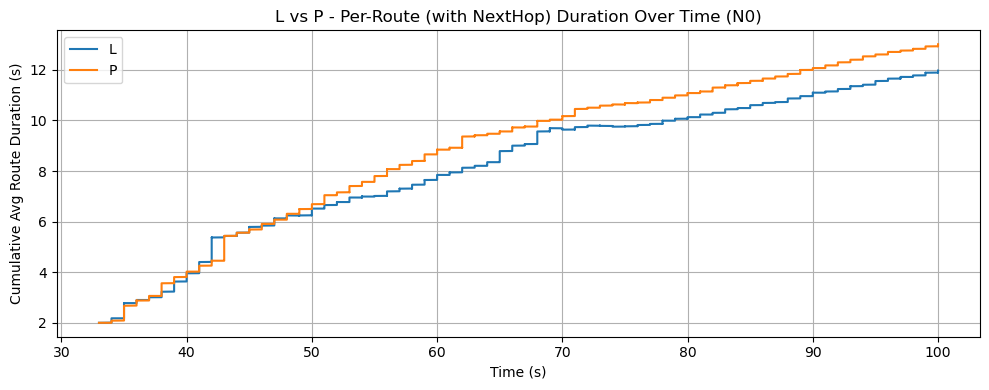

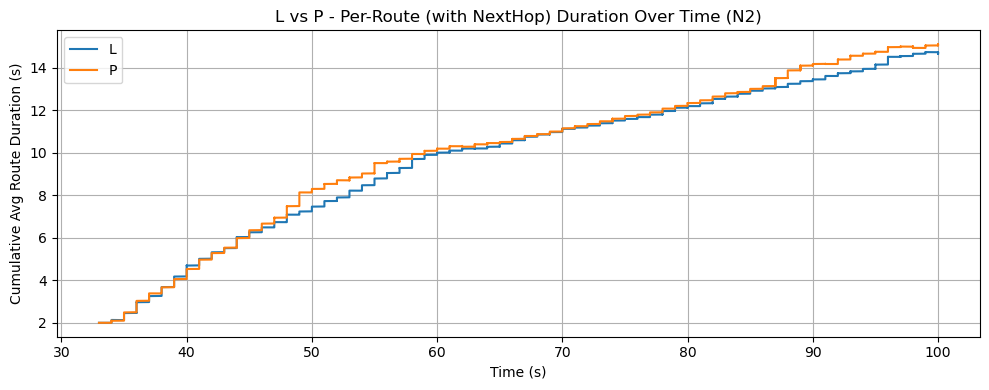

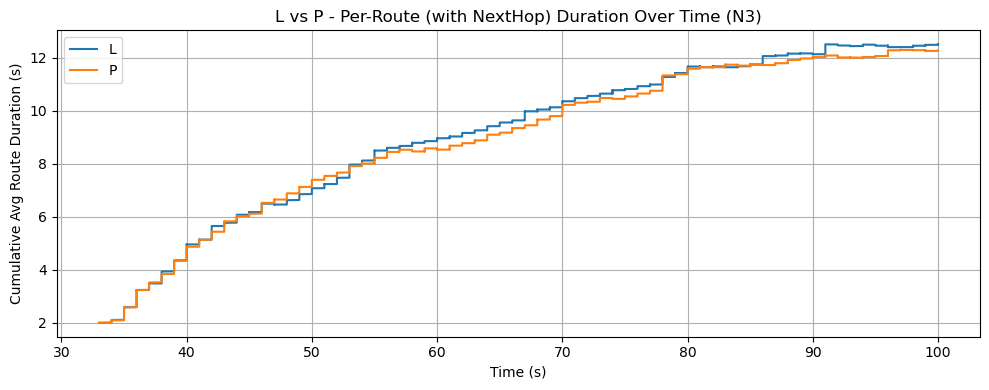

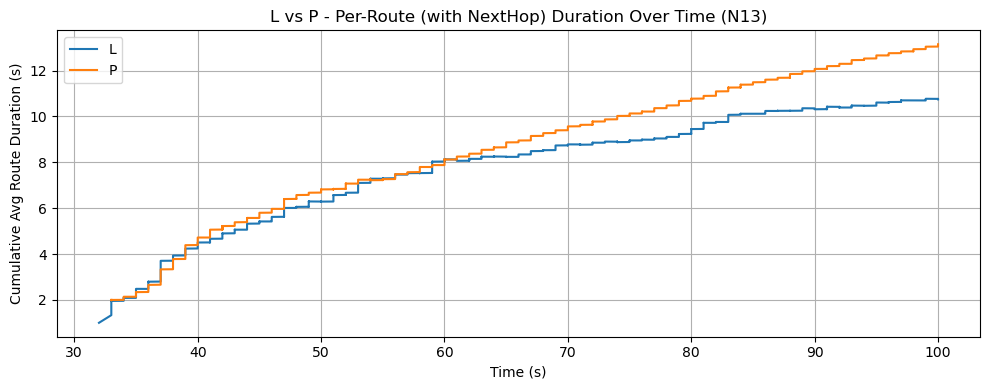

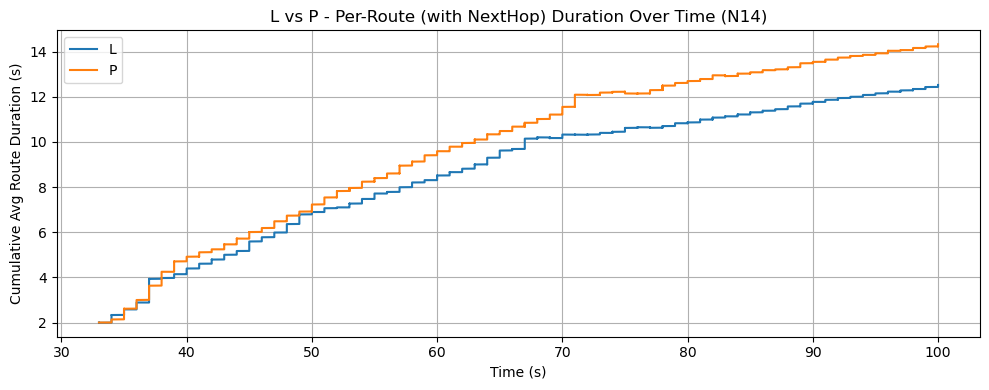

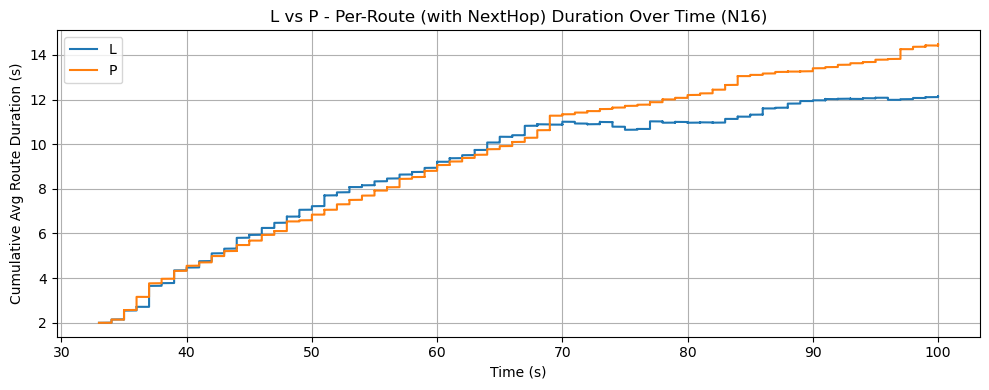

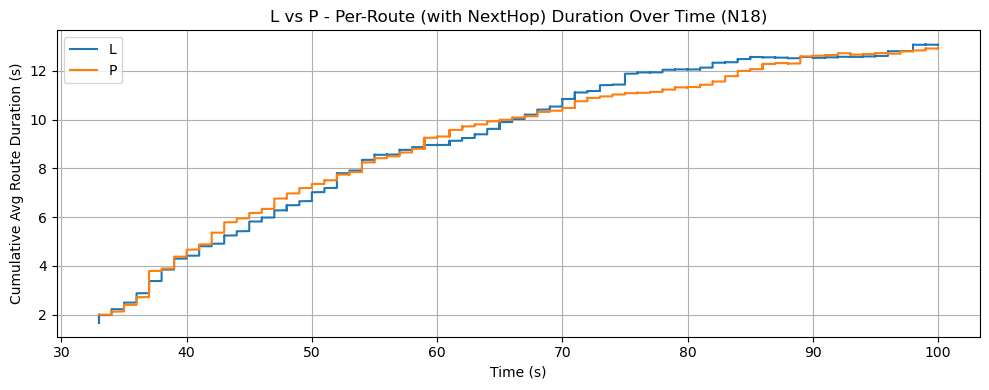

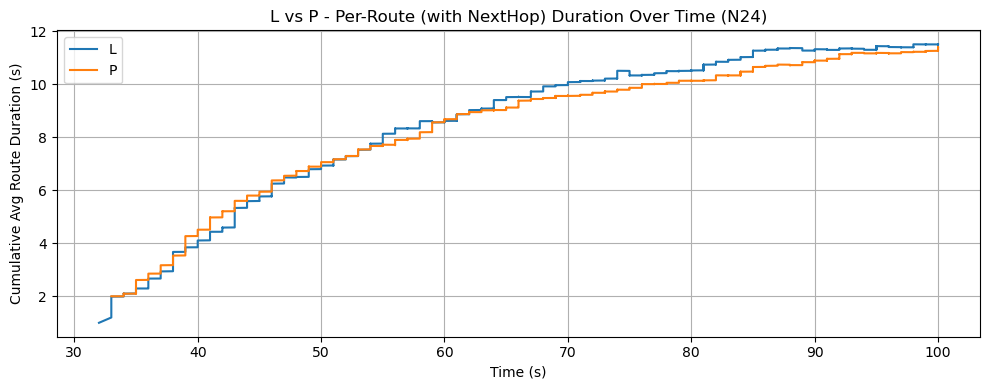

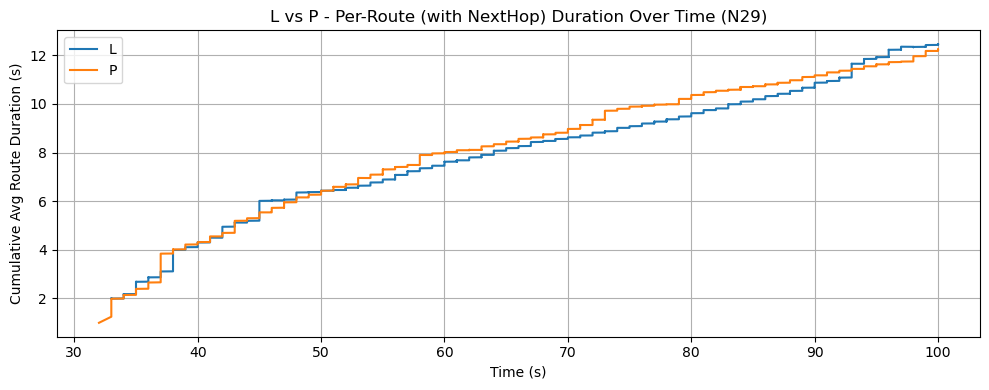

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

for node in nodes:
    results = {}
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(file_path):
            print(f"[{node}-{method}] 파일 없음: {file_path}")
            continue

        df = pd.read_csv(file_path)
        df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
        df["Time"] = df["Time"].astype(float)

        grouped = df.groupby(["Node", "Destination", "NextHop"])
        time_duration_pairs = []

        for (node_id, dest, nexthop), group in grouped:
            group = group.sort_values("Time")
            entry_time = None
            for _, row in group.iterrows():
                if row["Active"] == True and entry_time is None:
                    entry_time = row["Time"]
                elif row["Active"] == False and entry_time is not None:
                    duration = row["Time"] - entry_time
                    time_duration_pairs.append((row["Time"], duration))
                    entry_time = None

        df_result = pd.DataFrame(time_duration_pairs, columns=["Time", "Duration"])
        if df_result.empty:
            continue
        df_result = df_result.sort_values("Time")
        df_result["CumulativeAvg"] = df_result["Duration"].expanding().mean()
        results[method] = df_result

    if not results:
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["Time"], results[method]["CumulativeAvg"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Cumulative Avg Route Duration (s)")
    plt.title(f"L vs P - Per-Route (with NextHop) Duration Over Time ({node})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


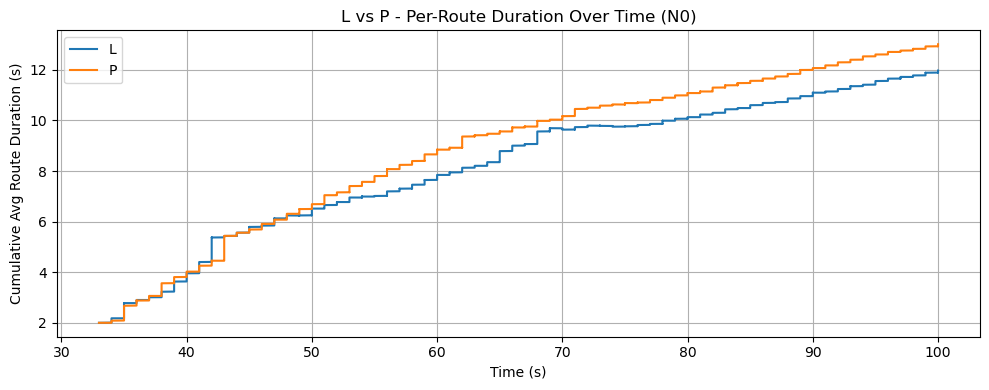

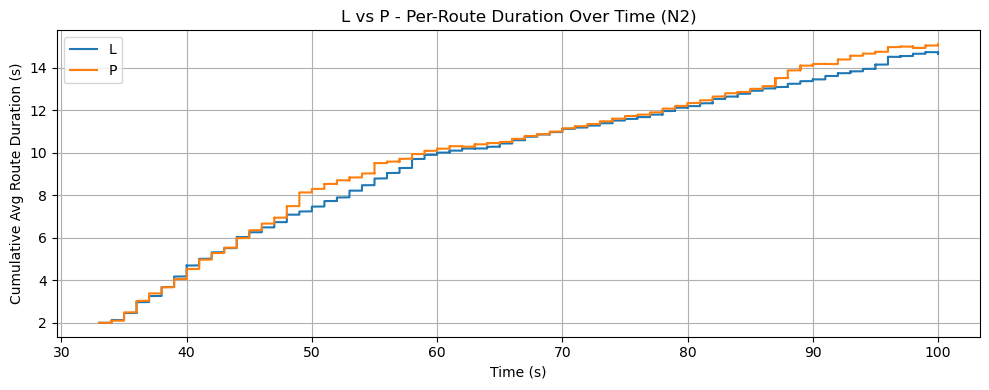

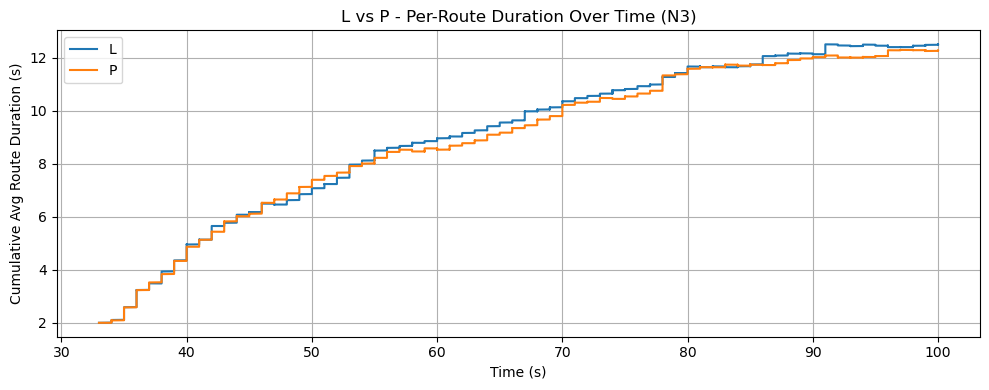

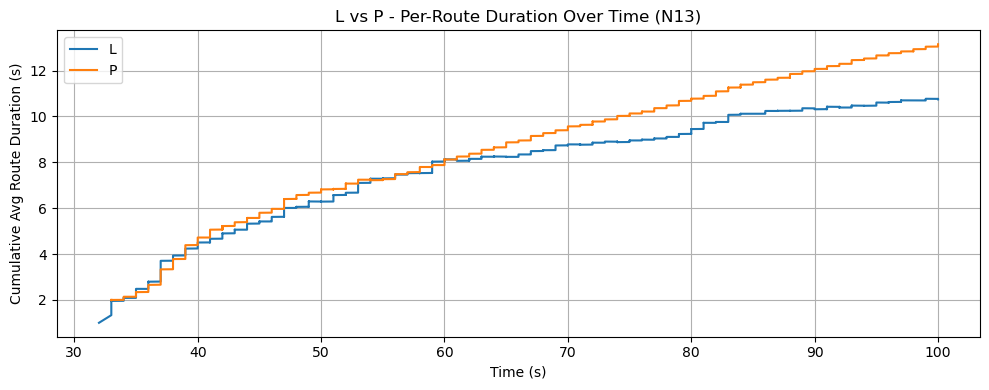

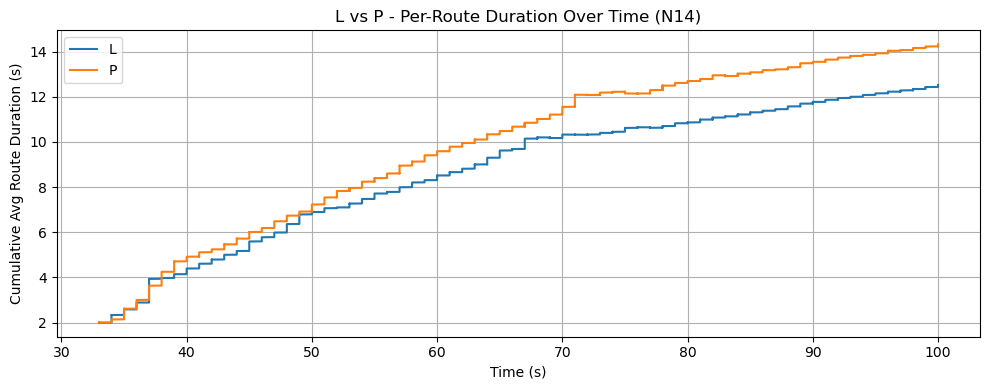

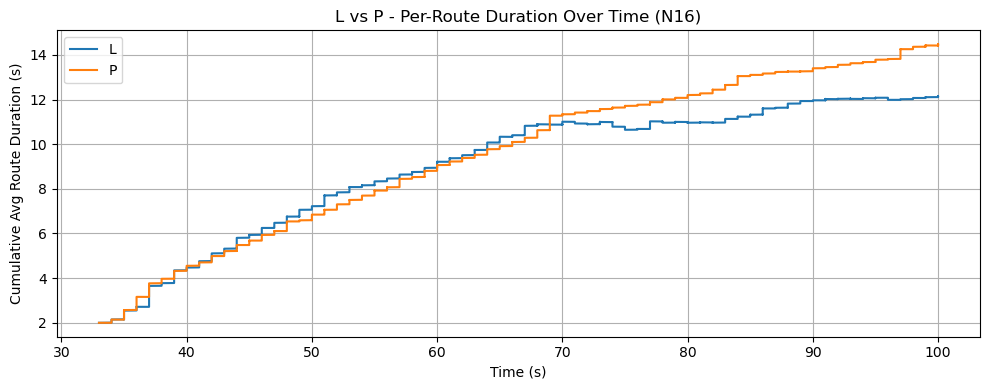

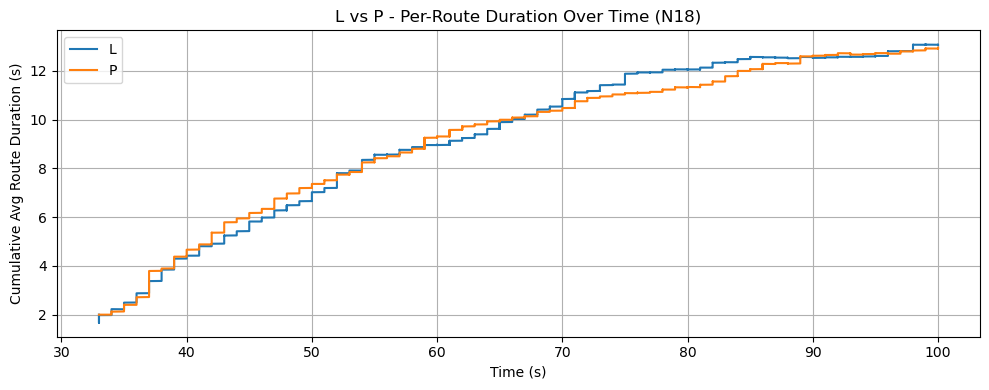

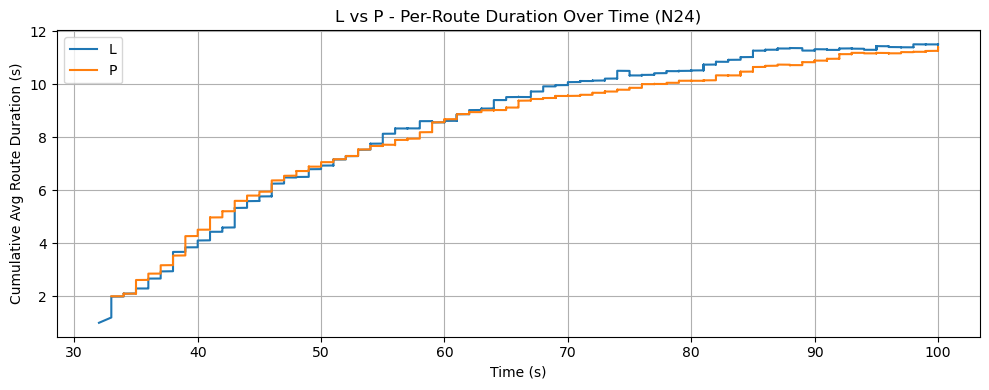

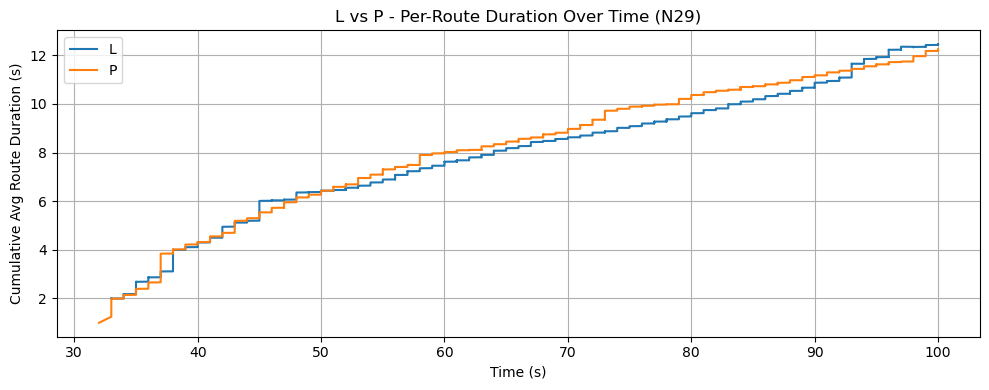

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

for node in nodes:
    results = {}
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(file_path):
            print(f"[{node}-{method}] 파일 없음: {file_path}")
            continue

        df = pd.read_csv(file_path)
        df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
        df["Time"] = df["Time"].astype(float)

        grouped = df.groupby(["Node", "Destination", "NextHop"])
        time_duration_pairs = []

        for (node_id, dest, nexthop), group in grouped:
            group = group.sort_values("Time")
            entry_time = None
            prev_active = None
            for _, row in group.iterrows():
                curr_active = row["Active"]
                if curr_active == True and prev_active != True:
                    entry_time = row["Time"]
                elif curr_active == False and prev_active == True and entry_time is not None:
                    duration = row["Time"] - entry_time
                    time_duration_pairs.append((row["Time"], duration))
                    entry_time = None
                prev_active = curr_active

        df_result = pd.DataFrame(time_duration_pairs, columns=["Time", "Duration"])
        if df_result.empty:
            continue
        df_result = df_result.sort_values("Time")
        df_result["CumulativeAvg"] = df_result["Duration"].expanding().mean()
        results[method] = df_result

    if not results:
        continue

    plt.figure(figsize=(10, 4))
    for method in methods:
        if method in results:
            plt.plot(results[method]["Time"], results[method]["CumulativeAvg"], label=method)
    plt.xlabel("Time (s)")
    plt.ylabel("Cumulative Avg Route Duration (s)")
    plt.title(f"L vs P - Per-Route Duration Over Time ({node})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [26]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

summary = []

for node in nodes:
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
        df["Time"] = df["Time"].astype(float)

        grouped = df.groupby(["Node", "Destination", "NextHop"])
        matched, true_only, false_only, empty = 0, 0, 0, 0

        for (node_id, dest, nexthop), group in grouped:
            states = group.sort_values("Time")["Active"].tolist()
            if not states:
                empty += 1
            elif True in states and False in states:
                matched += 1
            elif True in states and False not in states:
                true_only += 1
            elif False in states and True not in states:
                false_only += 1

        summary.append({
            "Node": node,
            "Method": method,
            "Matched": matched,
            "TrueOnly": true_only,
            "FalseOnly": false_only,
            "Empty": empty
        })

df_summary = pd.DataFrame(summary)
print(df_summary)


[L-N0]
   Time     Node  Destination      NextHop  Duration
0  61.0  node[0]  10.0.107.16  10.0.107.16       1.0
1  81.0  node[0]    node[101]    node[101]      19.0
2  83.0  node[0]    node[106]    node[106]      15.0
3  66.0  node[0]    node[122]    node[122]       2.0
4  89.0  node[0]    node[122]    node[122]      22.0
5  87.0  node[0]    node[161]    node[161]      25.0
6  39.0  node[0]    node[165]    node[165]       2.0
7  95.0  node[0]    node[177]    node[177]      16.0
8  49.0  node[0]    node[183]    node[165]       5.0
9  76.0  node[0]    node[183]    node[187]       5.0

[P-N0]
   Time     Node  Destination      NextHop  Duration
0  61.0  node[0]  10.0.107.16  10.0.107.16       1.0
1  83.0  node[0]    node[101]    node[101]      20.0
2  83.0  node[0]    node[106]    node[106]      14.0
3  68.0  node[0]    node[122]    node[122]       5.0
4  90.0  node[0]    node[122]    node[122]      21.0
5  88.0  node[0]    node[161]    node[161]      25.0
6  95.0  node[0]    node[177]  

In [27]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_01_AppSci_AODV_V09"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

summary = []

for node in nodes:
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
        df["Time"] = df["Time"].astype(float)

        grouped = df.groupby(["Node", "Destination", "NextHop"])
        matched, true_only, false_only, empty = 0, 0, 0, 0

        for (node_id, dest, nexthop), group in grouped:
            states = group.sort_values("Time")["Active"].tolist()
            if not states:
                empty += 1
            elif True in states and False in states:
                matched += 1
            elif True in states and False not in states:
                true_only += 1
            elif False in states and True not in states:
                false_only += 1

        summary.append({
            "Node": node,
            "Method": method,
            "Matched": matched,
            "TrueOnly": true_only,
            "FalseOnly": false_only,
            "Empty": empty
        })

df_summary = pd.DataFrame(summary)
print(df_summary)


   Node Method  Matched  TrueOnly  FalseOnly  Empty
0    N0      L    15684      8905        259      0
1    N0      P    14530      8233        366      0
2    N2      L    13512      8316        271      0
3    N2      P    15222      8053        393      0
4    N3      L    17197      7697        349      0
5    N3      P    19150      9932        324      0
6   N13      L    22693     11530        422      0
7   N13      P    15148      9955        380      0
8   N14      L    15109      7562        278      0
9   N14      P    13981      7568        258      0
10  N16      L    18379      7990        289      0
11  N16      P    15174      9023        368      0
12  N18      L    16996      8052        271      0
13  N18      P    17449      7932        375      0
14  N24      L    19762      9997        243      0
15  N24      P    20917     10211        447      0
16  N29      L    17158      8729        306      0
17  N29      P    17159      8449        312      0


In [29]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_14_AppSci_AODV_V10"
density = "D400"
speed = "S30"
nodes = ["N0", "N14"]
methods = ["L", "P"]

summary = []

for node in nodes:
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
        df["Time"] = df["Time"].astype(float)

        grouped = df.groupby(["Node", "Destination", "NextHop"])
        matched, true_only, false_only, empty = 0, 0, 0, 0

        for (node_id, dest, nexthop), group in grouped:
            states = group.sort_values("Time")["Active"].tolist()
            if not states:
                empty += 1
            elif True in states and False in states:
                matched += 1
            elif True in states and False not in states:
                true_only += 1
            elif False in states and True not in states:
                false_only += 1

        summary.append({
            "Node": node,
            "Method": method,
            "Matched": matched,
            "TrueOnly": true_only,
            "FalseOnly": false_only,
            "Empty": empty
        })

df_summary = pd.DataFrame(summary)
print(df_summary)


  Node Method  Matched  TrueOnly  FalseOnly  Empty
0   N0      L    15768      8764        172      0
1   N0      P    14573      8197        226      0
2  N14      L    15125      7544        127      0
3  N14      P    13988      7411        170      0


In [30]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_14_AppSci_AODV_V10"
density = "D400"
speed = "S30"
nodes = ["N0", "N14"]
methods = ["L", "P"]

summary = []
true_only_records = []

for node in nodes:
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        df = df[["Time", "Node", "Destination", "NextHop", "Active"]]
        df["Time"] = df["Time"].astype(float)

        grouped = df.groupby(["Node", "Destination", "NextHop"])
        matched, true_only, false_only, empty = 0, 0, 0, 0

        for (node_id, dest, nexthop), group in grouped:
            group_sorted = group.sort_values("Time")
            states = group_sorted["Active"].tolist()
            if not states:
                empty += 1
            elif True in states and False in states:
                matched += 1
            elif True in states and False not in states:
                true_only += 1
                start_time = group_sorted["Time"].min()
                end_time = group_sorted["Time"].max()
                true_only_records.append({
                    "Node": node,
                    "Method": method,
                    "Destination": dest,
                    "NextHop": nexthop,
                    "StartTime": start_time,
                    "EndTime": end_time,
                    "Duration": end_time - start_time
                })
            elif False in states and True not in states:
                false_only += 1

        summary.append({
            "Node": node,
            "Method": method,
            "Matched": matched,
            "TrueOnly": true_only,
            "FalseOnly": false_only,
            "Empty": empty
        })

df_summary = pd.DataFrame(summary)
df_trueonly = pd.DataFrame(true_only_records)

print("[요약 통계]")
print(df_summary)
print("\n[TrueOnly 경로 시간 통계]")
if not df_trueonly.empty:
    print(df_trueonly[["StartTime", "EndTime", "Duration"]].describe())
else:
    print("TrueOnly 경로 없음")


[요약 통계]
  Node Method  Matched  TrueOnly  FalseOnly  Empty
0   N0      L    15768      8764        172      0
1   N0      P    14573      8197        226      0
2  N14      L    15125      7544        127      0
3  N14      P    13988      7411        170      0

[TrueOnly 경로 시간 통계]
          StartTime       EndTime      Duration
count  31916.000000  31916.000000  31916.000000
mean      65.628042     86.087185     20.459143
std       22.482340     22.862278     20.477708
min       30.100000     30.100000      0.000000
25%       44.100000     79.100000      4.000000
50%       70.100000     99.100000     14.000000
75%       86.100000     99.100000     29.000000
max       99.100000     99.100000     69.000000


In [33]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_07_14_AppSci_AODV_V10"
density = "D400"
speed = "S30"
nodes = ["N0", "N14"]
methods = ["L", "P"]

true_only_routes = []

for node in nodes:
    for method in methods:
        rt_file = os.path.join(base_path, method, density, speed, node, "routing_table_log.csv")
        if not os.path.exists(rt_file):
            continue

        df_rt = pd.read_csv(rt_file)
        df_rt = df_rt[["Time", "Node", "Destination", "NextHop", "Active"]]
        df_rt["Time"] = df_rt["Time"].astype(float)

        grouped = df_rt.groupby(["Node", "Destination", "NextHop"])

        for (node_id, dest, nexthop), group in grouped:
            states = group.sort_values("Time")["Active"].tolist()
            if True in states and False not in states:
                true_only_routes.append({
                    "Method": method,
                    "Node": node,
                    "Destination": dest,
                    "NextHop": nexthop
                })

df_true = pd.DataFrame(true_only_routes)

send_logs = []

for node in nodes:
    for method in methods:
        send_file = os.path.join(base_path, method, density, speed, node, "aodv_send_log.csv")
        if not os.path.exists(send_file):
            continue

        df_send = pd.read_csv(send_file, names=["Time", "Node", "PacketName", "Duration", "PacketType", 
                                                "SrcAddr", "DestAddr", "TTL", "Delay", "CastType"])
        df_send = df_send[df_send["PacketType"].isin(["inet::aodv::Rrep", "inet::aodv::Rreq", "DATA"])]
        df_send["Node"] = node
        df_send["Method"] = method
        send_logs.append(df_send)

df_send_all = pd.concat(send_logs, ignore_index=True)

df_true["Used"] = df_true.apply(
    lambda row: (
        ((df_send_all["Node"] == row["Node"]) &
         (df_send_all["Method"] == row["Method"]) &
         (df_send_all["DestAddr"] == row["Destination"]) &
         (df_send_all["PacketName"].str.contains(str(row["NextHop"]), na=False)))
    ).any(),
    axis=1
)

used_count = df_true["Used"].sum()
total_count = len(df_true)

print(f"[TrueOnly 경로 사용 여부]")
print(f"전체 TrueOnly 경로 수: {total_count}")
print(f"실제로 사용된 경로 수 (패킷 전송에 등장): {used_count}")
print(f"사용되지 않은 경로 수: {total_count - used_count}")


[TrueOnly 경로 사용 여부]
전체 TrueOnly 경로 수: 31916
실제로 사용된 경로 수 (패킷 전송에 등장): 0
사용되지 않은 경로 수: 31916
